<div style="padding:30px 0px;">
    <h1 align="center" style="padding:50px">Hyperparameter Tuning With Pipelines</h1>
    <p align="center" style="font-size:small;">Seth Pruitt<br>spruitt@norstal.com<br>www.github.com/faradical</p>
</div>

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

## Generating Synthetic Data

In [2]:
# Generate a random regression dataset
X, y = make_regression(n_samples=1000, n_features=10, noise=100)

# Split the data into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9
0,1.857179,1.363183,0.797154,-0.981250,0.273640,-0.299684,-2.068569,-0.119699,-0.154144,-1.541841
1,0.739978,-0.315958,0.247607,-0.592257,0.850345,0.582349,-1.241383,-2.140711,1.949871,-1.161485
2,2.541411,-0.001318,-1.259475,1.266051,0.410154,0.618428,-2.482760,-0.016285,-0.897683,-0.341515
3,-0.517721,-0.303706,0.516967,1.245761,-0.386035,-1.893332,0.051888,1.038832,-0.221893,-1.402935
4,0.469104,0.892582,0.120734,-0.059092,0.052432,-0.723797,0.205125,0.144917,0.561664,-0.161297
...,...,...,...,...,...,...,...,...,...,...
745,-0.501103,-1.071328,-0.358999,0.190474,0.428289,-0.024997,-0.092291,2.750624,-0.638727,-1.767103
746,1.980353,-0.474389,-0.852337,0.282675,2.737826,0.045941,0.681216,1.931985,-0.380608,1.054061
747,-0.689430,0.490613,0.740925,1.264753,0.612700,-0.824682,0.608645,0.072250,1.452444,-0.185896
748,0.744939,1.006676,-0.542406,0.706673,1.416017,-2.599660,0.389059,-1.045527,-0.116808,0.037301


## Hyperparameter Tuning

### Method 1 - Grid Search Inside a Pipe

In [3]:
# Define a dictionary of hyperparameters to search over
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False]
}

# Perform a grid search with cross-validation
grid = GridSearchCV(LinearRegression(), param_grid, cv=5)

# Defining our pipeline and steps
p1 = Pipeline([
    ("Scaler", StandardScaler()),
    ("Linear Regression", grid)
])

# Fit and score the pipeline
p1.fit(X_train, y_train)
p1.score(X_test, y_test)

0.5860422973039143

### Method 2 - Pipe Inside a Grid Search

In [4]:
# Defining our pipeline and steps
p2 = Pipeline([
    ("Scaler", StandardScaler()),
    ("Linear Regression", LinearRegression())
])

# Define a dictionary of hyperparameters to search over
param_grid = {
    'Linear Regression__copy_X': [True, False],
    'Linear Regression__fit_intercept': [True, False]
}

# Perform a grid search with cross-validation
grid = GridSearchCV(p2, param_grid, cv=5)

# Fit and score the pipeline
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.5860422973039143

## Tuning the Pipeline

### Generating More Synthetic Data

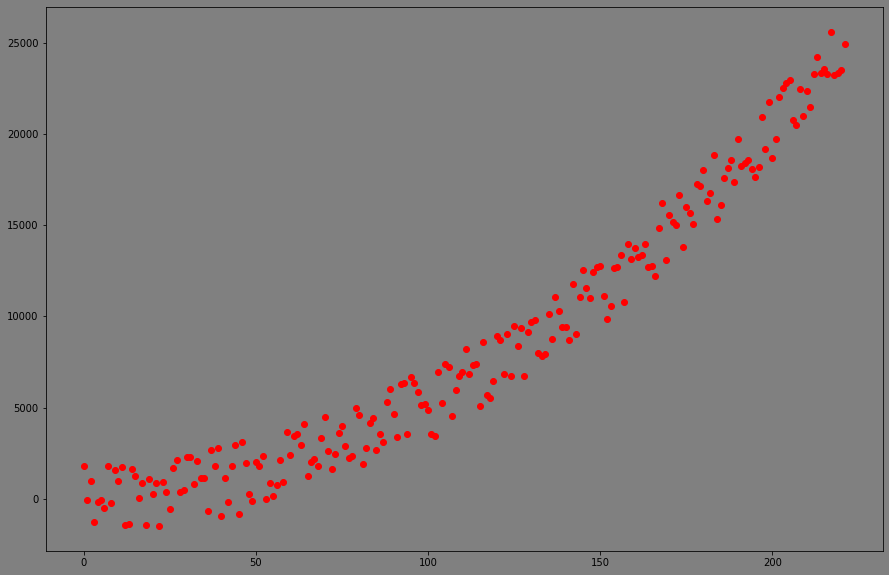

In [5]:
import numpy as np
import random as rn

def y_f(x):
    return (0.5 * (x**2)) + (2 * x) + 6

X = np.arange(222)
y = [y_f(x)+rn.randint(-2000,2000) for x in X]

# Plotting the dummy data
plt.figure(facecolor='gray', figsize=(15,10)).set_alpha(0.0)
ax = plt.axes()
ax.set_facecolor("gray")
ax.set_alpha(0.0)

plt.scatter(X, y, c='red', marker="o")
plt.show()

In [6]:
# Split the data into traing and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Building a New Pipeline

In [7]:
# Import PolynomialFeatures to help fit the linear model to the curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer

# Creating a reshape function
def reshape(X):
    return X.reshape(-1, 1)

# Defining a new pipeline
steps = [
    ("Reshape", FunctionTransformer(reshape)),
    ("Scaler", StandardScaler()),
    ("PolynomialFeatures", PolynomialFeatures()),
    ("Linear Regression", LinearRegression())
]
p3 = Pipeline(steps)

### Executing a Grid Search Over the New Pipeline

In [8]:
# Define a dictionary of hyperparameters for both the model and pipeline steps.
param_grid = {
    'Scaler__with_mean': [True, False],
    'Scaler__with_std': [True, False],
    'PolynomialFeatures__degree': np.arange(1,4),
    'PolynomialFeatures__interaction_only': [True, False],
    'PolynomialFeatures__include_bias': [True, False],
    'PolynomialFeatures__order': ['C', 'F'],
    'Linear Regression__copy_X': [True, False],
    'Linear Regression__fit_intercept': [True, False]
}

# Perform a grid search with cross-validation
grid = GridSearchCV(p3, param_grid, cv=5)

# Fit and score the pipeline
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

0.9671960264177579